In [13]:
import numpy as np
import pickle
import natsort
import os

In [61]:
with open('annotations_test.pkl', 'rb') as f:
    data = pickle.load(f)
files = list(data.keys())
normal_paths = {}

for fpath in files:
    path = fpath.split('/')
    frame = int(path[-1].split('.')[0][-6:])
    
    num = path[-1][:-16]
    img_dir = os.path.join('/playpen/Datasets/geodepth2/', num, 'img_corr')
    dir_list = natsort.natsorted(os.listdir(img_dir))
    zero_frame = int(dir_list[0].split('_')[-1][-10:-4])
    index = dir_list.index(path[-1][-15:])

    normals = os.path.join('/playpen/Datasets/geodepth2/', num, 'NFPS', 'images', f'{num}_{index:03d}', f'{num}_{index:03d}_nr_pred.npy')
    if fpath[0]=='/':
        normals = '/'+normals
    normal_paths[os.path.join(img_dir, path[-1][-15:])] = normals
    print(os.path.join(img_dir, path[-1][-15:]))
with open('normal_paths_test.pkl', 'wb') as f:
    pickle.dump(normal_paths, f)

/playpen/Datasets/geodepth2/000/img_corr/frame031430.jpg
/playpen/Datasets/geodepth2/001/img_corr/frame023226.jpg
/playpen/Datasets/geodepth2/001/img_corr/frame023256.jpg
/playpen/Datasets/geodepth2/001/img_corr/frame023444.jpg
/playpen/Datasets/geodepth2/002/img_corr/frame024047.jpg
/playpen/Datasets/geodepth2/002/img_corr/frame024185.jpg
/playpen/Datasets/geodepth2/002/img_corr/frame024188.jpg
/playpen/Datasets/geodepth2/004/img_corr/frame036482.jpg
/playpen/Datasets/geodepth2/004/img_corr/frame036489.jpg
/playpen/Datasets/geodepth2/005/img_corr/frame053555.jpg
/playpen/Datasets/geodepth2/005/img_corr/frame053574.jpg
/playpen/Datasets/geodepth2/005/img_corr/frame053677.jpg
/playpen/Datasets/geodepth2/005/img_corr/frame053812.jpg
/playpen/Datasets/geodepth2/006/img_corr/frame054119.jpg
/playpen/Datasets/geodepth2/006/img_corr/frame054134.jpg
/playpen/Datasets/geodepth2/007/img_corr/frame014287.jpg
/playpen/Datasets/geodepth2/008/img_corr/frame034025.jpg
/playpen/Datasets/geodepth2/009

In [12]:
path = '/playpen/Datasets/geodepth2/000/img_corr/frame031194.jpg'.split('/')
int(path[-1].split('.')[0][5:])

31194

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


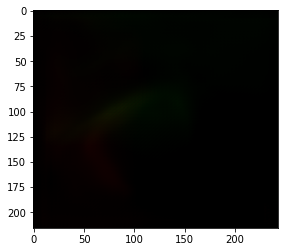

In [28]:
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

normals = np.load('/playpen/Datasets/geodepth2/019/NFPS/images/019_055/019_055_nr_pred.npy')
normals = zoom(normals, (1, 0.9, 1), order=1)
plt.imshow(normals)

In [45]:
with open('normal_paths_test.pkl', 'rb') as f:
    data = pickle.load(f)
print(list(data.keys())[:5])

['/playpen/Datasets/test-set/000_frame031430.jpg', '/playpen/Datasets/test-set/001_frame023226.jpg', '/playpen/Datasets/test-set/001_frame023256.jpg', '/playpen/Datasets/test-set/001_frame023444.jpg', '/playpen/Datasets/test-set/002_frame024047.jpg']
